<div align="right">Python 2.7 Jupyter Notebook</div>

# Collect your own data

### Your completion of the notebook exercises will be graded based on your ability to:

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

# Notebook introduction

This notebook will introduce you to two tools that will be discussed in detail in future video content. You can complete the exercise using the sample dataset or generate your own using the instructions below if you have access to an Android device.


To demonstrate the different lengths of time it takes to gain insights when performing an analysis, you will start to explore the provided dataset (or your own) through a manual analysis cycle, before switching to using the bandicoot framework. You will be introduced to this tool in more detail in Module 5.

> **Note**: 

> It is strongly recommended that you save a checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.

#### Load libraries and set options

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import os
import bandicoot as bc
from IPython.display import IFrame
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


## 1. Collect your own data

This notebook will start with an example dataset, on which you will perform similar activities to those demonstrated in Module 2 Notebook 2 Section 1. You are also welcome to share your dataset with fellow students in cases where they do not have access to android devices if you are comfortable to do so.

> Building applications is a separate topic, and we will start by using another open source project from MIT to process your data in a format that can be utilized for analysis.

[Bandicoot](http://bandicoot.mit.edu/) is an open-source python toolbox, which analyzes mobile phone metadata. This section will demonstrate how it can be used to collect your own data. Additional examples, as well as how Bandicoot is used to analyze mobile phone data, will be demonstrated in Module 5.

***If you have an Android phone***, you can export your own metadata by following these steps:
1. Go to http://bandicoot.mit.edu/android and install the application on your phone;
2. Export your data, email it to yourself, and upload the CSV file to the "data" directory in "module_2" on your virtual analysis environment.
3. You can then complete the example using your own dataset.

> **Note**:

> You can upload files from the directory view in your Jupyter notebook. Ensure that you select the file and then click "upload" again to start the upload process.

> ![Uploading files screenshot](Upload_01.png "Screenshot of uploading files")

***If you don't have access to an Android phone*** we have supplied a file, named "metadata_sample.csv" in the "data" directory under "module_2" which you can use for your analysis.

### 1.1 Load the data

First, load the supplied csv file using additional options in the Pandas read_csv function. It is possible to set the index, and instruct the function to parse the datetime column when loading the file. You can read more about the function [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [3]:
# Load the dataset.
#     You can change the filename to reflect the name of your generated dataset,
#     if you downloaded the application in the previous step. The default filename
#     is "metadata.csv".
calls = pd.read_csv("data/metadata_sample.csv",parse_dates=['datetime'],
                    index_col=['datetime'])

Display the head.

In [4]:
calls.head(5)

,interaction,direction,correspondent_id,call_duration,antenna_id
datetime,,,,,
2016-06-21 08:20:07,call,out,fed079947094d088440b53367bca7653ee7e62e7,NaN,NaN
2016-06-21 08:21:52,text,in,8fea1791eba929dbae3bddfe64861f86679deeaf,NaN,NaN
2016-06-21 08:22:23,call,out,fed079947094d088440b53367bca7653ee7e62e7,3.0,NaN
2016-06-21 08:23:03,call,out,effc58da851b9ab004194a8c74998802d0bcca45,NaN,NaN
2016-06-21 08:23:27,call,out,fed079947094d088440b53367bca7653ee7e62e7,2.0,NaN


### 1.2 Derived features
Similarly to the previous notebook, you can add derived features to your dataset, as demonstrated in the example below.

In [5]:
# Add a column where the week is derived from the datetime column.
calls['week'] = calls.index.map(lambda observation_timestamp: 
                                observation_timestamp.week)

# Display the head of the new dataset.
calls.head(5)

,interaction,direction,correspondent_id,call_duration,antenna_id,week
datetime,,,,,,
2016-06-21 08:20:07,call,out,fed079947094d088440b53367bca7653ee7e62e7,NaN,NaN,25
2016-06-21 08:21:52,text,in,8fea1791eba929dbae3bddfe64861f86679deeaf,NaN,NaN,25
2016-06-21 08:22:23,call,out,fed079947094d088440b53367bca7653ee7e62e7,3.0,NaN,25
2016-06-21 08:23:03,call,out,effc58da851b9ab004194a8c74998802d0bcca45,NaN,NaN,25
2016-06-21 08:23:27,call,out,fed079947094d088440b53367bca7653ee7e62e7,2.0,NaN,25


### 1.3 Display the list of interaction types.
This function can be very useful when working with large or dirty datasets.

In [6]:
calls.interaction.unique()

array(['call', 'text'], dtype=object)

### 1.4 Visualizing your data
You can make use of the default options, as demonstrated below, in order to get a quick overview of possible data visualizations. Alternatively, you can start performing a manual analysis on the dataset as demonstrated in the previous notebook.

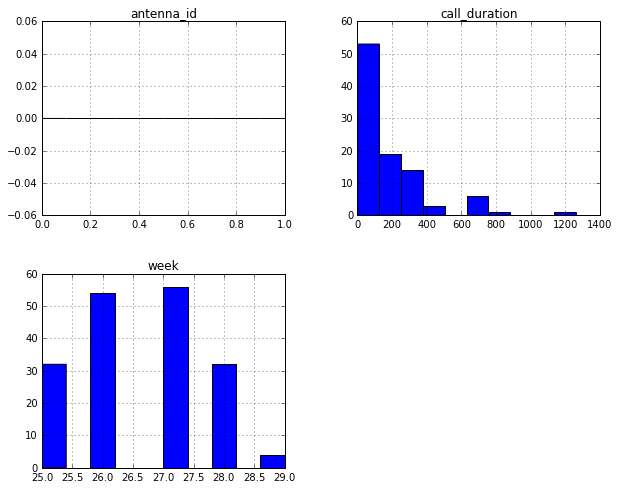

In [7]:
vis = calls.hist()

### 1.5 Manual analysis vs using libraries

The manual method is fairly tedious. In many cases you have to define what it is that you would like to visualize, and then complete the steps manually. This is where Bandicoot comes in. Using a library that has been created specifically to look at a certain type of data (in this example, mobile phone data ) can save you a significant amount of time.

More content about Bandicoot will be provided in Module 5, however, the following section will give you an idea of how powerful these tools are when used correctly.

#### 1.5.1 Load the input file

In [8]:
U = bc.read_csv("data/metadata_sample", "")

[x] 143 records from 2016-06-21 08:21:52 to 2016-07-19 21:02:11
[x] 57 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network


         call_duration: 35 record(s) with incomplete values
         No antennas file was given and records are using antennas for position.


#### 1.5.2 Export the visualization to disk and embed in this notebook
In order to avoid having to open additional ports on your virtual analysis environment and potentially on your local network, we can export the visualization to disk and embed it directly in this notebook.

Screenshot supplied of sample file.
![Bandicoot visualization](bc_visualization_screenshot.png "Screenshot of Bandicoot visualization.")

You can execute the code cells below to visualize the input file selected in 1.5.1.

In [9]:
# Export the visualization to a new directory, "viz".
bc.visualization.export(U, "viz");

Successfully exported the visualization to viz


In [10]:
# Display the exported visualization in a frame within this notebook
IFrame("viz/index.html", "100%", 700)

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>

### Instructions
> In 1.5.1 the function automatically removes calls with a zero duration. Can you think of a use case where the zero length calls would have a specific meaning and you would be interested in retaining these records?

> In the majority of cases these records would be removed, but we want you to think about the contents of the dataset and what zero duration calls may signify if the records were based on your personal behavior.

The use case is that you are calling someone but the calling was not answered, or someone called you and you did not answer the phone at that time. In a word, missed calls make sense for zero length calls. 

The contents of the dataset would be the calls missed. The zero duration calls may signify unanswered calls or missed calls so that you could call back or wait for the one you called to call back.

<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

#### Wrap-up
In Module 5 we will introduce to [Bandicoot](http://bandicoot.mit.edu/) in more detail and we will explore and use additional features of this library.

# 2. Building Applications using Funf

[Funf](https://github.com/OpenSensing/funf-core-android) was introduced to you in Video 4 of this module. You are welcome to review the code on GitHub, as well as download and create your own application. Should you wish to do so, it is a good idea to start [here](https://github.com/funf-org/funf-core-android/wiki/WifiScannerTutorial). Funf is a fork of the popular Funf open sensing framework. You can visit the original project's [wiki](https://github.com/funf-org/funf-core-android/wiki) for more detail about architecture design, documentation and scripts for processing collected data.

Students interested in building their own applications can review the links and obtain the source from the supplied links. The documentation provides instructions run and modify the source. You can create an app to collect your own data, but will require access to additional components:
 - Android SDK
 - Application on top that points to the library: https://github.com/OpenSensing/android-opensensin

# 3. Submit your notebook

Please ensure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as", and "IPython Notebook (.ipynb); and
- Submit a copy of this file to the online campus.